In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
imdb_df=pd.read_csv("imdb.csv",escapechar='\\')
movie_df=pd.read_csv("movie_metadata.csv")

In [8]:
#Q6 Using the movie metadata set and the imdb data set come up with finidings (slice and dice the data to identify insights) and also create charts whereever possible.
def insights(imdb_df,movie_df):
    movie_df2=pd.concat([movie_df['title_year'], movie_df['gross']], axis=1)
    movie_df2.groupby(pd.cut(movie_df2['title_year'], np.arange(movie_df2['title_year'].min(), movie_df2['title_year'].max()+1, 10)))['gross'].sum().reset_index()
    #Year vs Gross Chart
    print(movie_plot(movie_df2))

    imdb_df9=pd.concat([imdb_df['imdbRating'], imdb_df['nrOfWins']], axis=1)
    imdb_df9.groupby(pd.cut(imdb_df9['imdbRating'], np.arange(imdb_df['imdbRating'].min(), imdb_df9['imdbRating'].max()+1, 1)))['nrOfWins'].sum().reset_index()
    #IMDB Rating vs Awards Won Chart
    print(imdb_plot(imdb_df9))

    #Pie Chart of Types in IMDB dataset
    print(type_plot(imdb_df))

def movie_plot(movie_df2):
    x=movie_df2['title_year']
    y=movie_df2['gross']
    plt.bar(x,y, alpha=0.8)
    plt.ylabel('Total Gross');
    plt.xlabel('Years')
    plt.title('Year Vs Gross')
    plt.show()

def imdb_plot(imdb_df9):
    x=imdb_df9['imdbRating']
    y=imdb_df9['nrOfWins']
    plt.bar(x,y,color='green',alpha=0.5)
    plt.ylabel('No. of Awards Won');
    plt.xlabel('IMDB Rating');
    plt.title('IMDB Rating Vs Awards Won')
    plt.show()

def type_plot(imdb_df):
    x=pd.DataFrame(imdb_df["type"].str.split(".", n = 1, expand = True))
    x.columns=['count','type']
    x=x.groupby('type').count().reset_index()
    plt.pie(x['count'], labels=x['type'],autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.show()

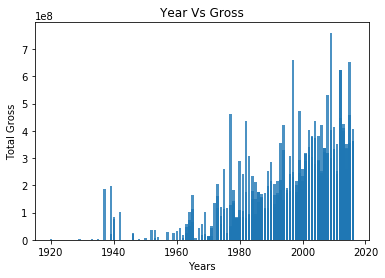

None


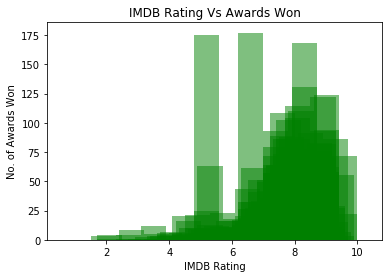

None


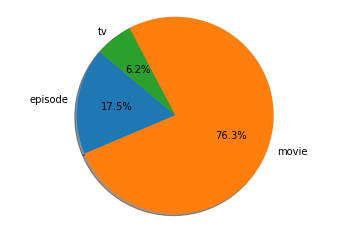

None


In [9]:
insights(imdb_df,movie_df)

In [ ]:
# From the above representations:
# 1. Year vs Gross
#    Insights are that data in movie_metadata dataset represents that movies released in released after 2000 are grossing more  
#    as compare to the movies released in previous years.
# 2. IMDB Rating vs Awards Won
#    Insights are that data in imdb dataset represents that movies/episode/TV whose IMDB ratings are above 8 have won more 
#    awards as compare to those who have less imdb ratings.
# 3. Pie Chart of Types 
#    Insight are that mojority of entries in imdb datasets types are movies with 76.3%.